In [1]:
import pandas as pd

# Importing the training and testing datasets
train_data_scaled = pd.read_csv('/Users/arka_bagchi/Desktop/Springboard/Data Storytelling/train_data_scaled.csv')
test_data_scaled = pd.read_csv('/Users/arka_bagchi/Desktop/Springboard/Data Storytelling/test_data_scaled.csv')

# Checking the first few rows of the imported datasets
print(train_data_scaled.head())
print(test_data_scaled.head())


   DateType    Heroin   Cocaine  Fentanyl_Analogue  Oxycodone  Oxymorphone  \
0 -0.898816  1.008269  1.535406          -0.287355  -0.367558    -0.147087   
1 -0.898816  1.008269 -0.651293          -0.287355  -0.367558    -0.147087   
2 -0.898816 -0.991798 -0.651293          -0.287355  -0.367558    -0.147087   
3 -0.898816 -0.991798 -0.651293          -0.287355  -0.367558    -0.147087   
4 -0.898816 -0.991798  1.535406          -0.287355  -0.367558    -0.147087   

    Ethanol  Hydrocodone  Benzodiazepine  Methadone  ...  \
0 -0.568897    -0.153231        1.673409  -0.320101  ...   
1 -0.568897    -0.153231       -0.597582  -0.320101  ...   
2 -0.568897    -0.153231       -0.597582   3.124019  ...   
3 -0.568897    -0.153231       -0.597582  -0.320101  ...   
4 -0.568897    -0.153231       -0.597582  -0.320101  ...   

   MannerofDeath_accident  AgeGroup_19-30  AgeGroup_31-40  AgeGroup_41-50  \
0               -0.050552       -0.492021        1.742987       -0.564972   
1               

Model Selection:

Since the target variable (presence of Fentanyl) is categorical, we'll focus on classification models.
We'll select three different models for comparison: Logistic Regression, Random Forest, and Support Vector Classifier (SVC).
Model Training:

We'll train each of these models using the training dataset.
Hyperparameter Tuning:

We'll use cross-validation to tune the hyperparameters of these models to improve performance.
Model Evaluation:

We'll evaluate the models based on standard metrics: accuracy, recall, precision, and F1 score on both the training and testing datasets.
We'll also check for overfitting by comparing the performance on both datasets.
Model Comparison and Selection:

We'll compare the models based on the evaluation metrics and select the best model considering not only performance but also computational efficiency, scalability, and maintenance costs.
Analysis and Interpretation:

We'll analyze the predictions made by the best model, compare its performance on the training and testing datasets, and provide insights.

In [2]:
# Importing necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix


# Separating the features (X) from the target variable (y) for both training and testing datasets
X_train = train_data_scaled.drop('Fentanyl', axis=1)
y_train = train_data_scaled['Fentanyl']
X_test = test_data_scaled.drop('Fentanyl', axis=1)
y_test = test_data_scaled['Fentanyl']

# Initial model training with default hyperparameters

# Logistic Regression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

# Random Forest
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)

# Support Vector Classifier
svc = SVC(random_state=42)
svc.fit(X_train, y_train)

# Initial evaluation on the training data
initial_eval_train = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'Support Vector Classifier'],
    'Accuracy': [accuracy_score(y_train, log_reg.predict(X_train)),
                 accuracy_score(y_train, random_forest.predict(X_train)),
                 accuracy_score(y_train, svc.predict(X_train))],
    'Precision': [precision_score(y_train, log_reg.predict(X_train)),
                  precision_score(y_train, random_forest.predict(X_train)),
                  precision_score(y_train, svc.predict(X_train))],
    'Recall': [recall_score(y_train, log_reg.predict(X_train)),
               recall_score(y_train, random_forest.predict(X_train)),
               recall_score(y_train, svc.predict(X_train))],
    'F1 Score': [f1_score(y_train, log_reg.predict(X_train)),
                 f1_score(y_train, random_forest.predict(X_train)),
                 f1_score(y_train, svc.predict(X_train))]
})

initial_eval_train


,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.727696,0.712834,0.629983,0.668852
1,Random Forest,0.887255,0.875925,0.864121,0.869983
2,Support Vector Classifier,0.802941,0.780264,0.763616,0.771850


The initial evaluation of the models on the training data is as follows:

Logistic Regression:

Accuracy: 
72.77%

Precision: 
71.28%
Recall: 
63.00%

F1 Score: 
66.89%

Random Forest:

Accuracy: 
88.73%

Precision: 
87.59%

Recall: 
86.41%

F1 Score: 
86.99%

Support Vector Classifier (SVC):

Accuracy: 
80.29%

Precision: 
78.03%

Recall: 
76.36%

F1 Score: 
77.19%

Next, we'll perform hyperparameter tuning using cross-validation to improve the performance of these models. We'll use GridSearchCV to search for the optimal hyperparameters for each model. This will also provide a more robust assessment of the model performance as it averages performance across multiple subsets of the training data.

In [4]:
# Hyperparameter tuning for Logistic Regression using GridSearchCV

# Adjusting the hyperparameter grid for Logistic Regression
param_grid_log_reg = {
    'penalty': ['l2'],  # Removing 'l1' penalty as it's not supported with the default solver
    'C': [0.01, 0.1, 1, 10, 100]
}

# GridSearchCV for Logistic Regression
grid_search_log_reg = GridSearchCV(log_reg, param_grid_log_reg, cv=5, scoring='f1', n_jobs=-1, verbose=1)
grid_search_log_reg.fit(X_train, y_train)

# Displaying the best hyperparameters for Logistic Regression
best_hyperparameters_log_reg = grid_search_log_reg.best_params_
best_hyperparameters_log_reg


Fitting 5 folds for each of 5 candidates, totalling 25 fits


{'C': 10, 'penalty': 'l2'}

The best hyperparameters for Logistic Regression, as determined by GridSearchCV, are:

Regularization Strength (C): 10
Penalty: l2 (L2 regularization) 

In [5]:
# Hyperparameter tuning for Random Forest using GridSearchCV

# Adjusting the hyperparameter grid for Random Forest to reduce the search space
param_grid_random_forest = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# GridSearchCV for Random Forest
grid_search_random_forest = GridSearchCV(random_forest, param_grid_random_forest, cv=5, scoring='f1', n_jobs=-1, verbose=1)
grid_search_random_forest.fit(X_train, y_train)

# Displaying the best hyperparameters for Random Forest
best_hyperparameters_random_forest = grid_search_random_forest.best_params_
best_hyperparameters_random_forest


Fitting 5 folds for each of 24 candidates, totalling 120 fits


{'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 100}

Best hyperparameters for Random Forest:

max_depth: 10
min_samples_leaf: 1
min_samples_split: 5
n_estimators: 100


In [7]:
# Hyperparameter tuning for Support Vector Classifier (SVC) using GridSearchCV

# Hyperparameter grid for SVC
param_grid_svc = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'rbf', 'poly']
}

# GridSearchCV for SVC
grid_search_svc = GridSearchCV(svc, param_grid_svc, cv=5, scoring='f1', n_jobs=-1, verbose=1)
grid_search_svc.fit(X_train, y_train)

# Displaying the best hyperparameters for SVC
best_hyperparameters_svc = grid_search_svc.best_params_
best_hyperparameters_svc


Fitting 5 folds for each of 18 candidates, totalling 90 fits


{'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}

SVC best hyperparameters:

Regularization parameter (C): 10
Kernel coefficient: auto
Kernel type: radial basis function 

In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Defining the models with the best hyperparameters
log_reg_best = LogisticRegression(C=10, penalty='l2', random_state=42)
random_forest_best = RandomForestClassifier(max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100, random_state=42)
svc_best = SVC(C=10, gamma='auto', kernel='rbf', random_state=42)

# Training the models on the training dataset
log_reg_best.fit(X_train, y_train)
random_forest_best.fit(X_train, y_train)
svc_best.fit(X_train, y_train)

# Evaluating the models on the testing dataset
models = [log_reg_best, random_forest_best, svc_best]
model_names = ['Logistic Regression', 'Random Forest', 'Support Vector Classifier']
performance_metrics = {}

for model, name in zip(models, model_names):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    performance_metrics[name] = [accuracy, precision, recall, f1]

# Creating a DataFrame to display the performance metrics for each model
performance_df = pd.DataFrame(performance_metrics, index=['Accuracy', 'Precision', 'Recall', 'F1 Score']).T
performance_df


,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.740196,0.735602,0.631461,0.679565
Random Forest,0.801961,0.784543,0.752809,0.768349
Support Vector Classifier,0.799020,0.780374,0.750562,0.765178


The Random Forest model has the highest accuracy and F1 score among the three models. The F1 score is a good metric to consider for imbalanced datasets as it balances both precision and recall. This model also has relatively high precision and recall, making it a robust choice for this project.

The Support Vector Classifier also performs well and is very close to the Random Forest in terms of all the metrics.

The Logistic Regression model has lower metrics compared to the other two models, making it the least preferable among the three for this task.



Performance:
Random Forest has the highest accuracy and F1 score among the three models, making it the top performer in terms of prediction accuracy and balance between precision and recall.
Support Vector Classifier (SVC) is slightly behind Random Forest in terms of performance metrics but still performs well.
Logistic Regression lags in performance compared to the other two models.

Computational Complexity:
Random Forest tends to be computationally more intensive, especially as the number of trees in the forest increases. Training and prediction times can be long for large datasets.
SVC also has high computational complexity, especially for large datasets, and the GridSearch for hyperparameter tuning can be time-consuming.
Logistic Regression is computationally less intensive and faster to train compared to the other two models.

Scalability: Random Forest and SVC may struggle with scalability as the dataset size increases due to their higher computational complexity.
Logistic Regression is more scalable and can handle larger datasets more efficiently.

Maintenance: Random Forest and SVC may require more maintenance, especially when hyperparameters need tuning for new data or when the underlying data distribution changes.
Logistic Regression is simpler and may require less maintenance.


Intepretability: Random Forest provides feature importance, which can be useful for interpretation, but the model itself is a black-box model.
SVC is less interpretable and understanding the decision boundary in high-dimensional space can be challenging.
Logistic Regression is more interpretable as it provides coefficients for each feature indicating their importance and effect on the prediction.


If the primary concern is performance and interpretability, the Random Forest model seems to be a good choice, albeit at the cost of higher computational complexity.
If scalability, computational efficiency, and maintenance are more crucial, Logistic Regression might be a preferable choice despite its lower performance metrics.
The SVC sits somewhere in between but leans more towards the Random Forest in terms of computational complexity and performance.

Given the scenario of analyzing overdose deaths, the primary goal would likely be to accurately identify instances where Fentanyl is present, as this could potentially save lives or direct policy and intervention efforts. Therefore, a balance between high performance (in terms of precision and recall) and interpretability would be crucial to understand the underlying factors contributing to Fentanyl presence and to communicate these findings to stakeholders.

Considering these factors, the Random Forest model would be the most suitable choice among the three. Here are the key reasons:



Performance:

Random Forest has the highest accuracy and F1 score among the three models, which is critical for a sensitive and impactful analysis such as overdose deaths.
It also has a good balance of precision and recall, which is crucial to minimize false negatives and false positives in such a critical scenario.
Interpretability:

Although not as interpretable as Logistic Regression, Random Forest provides feature importance scores that can help in understanding the factors contributing to Fentanyl presence. This is vital for deriving actionable insights and recommendations.
Robustness:

Random Forest is known for its robustness to outliers and ability to handle imbalanced datasets, which might be the case in overdose death analysis.
Maintenance:

While Random Forest may require more maintenance compared to Logistic Regression, the benefits of higher accuracy and the ability to derive actionable insights outweigh the maintenance cost in this critical use case.

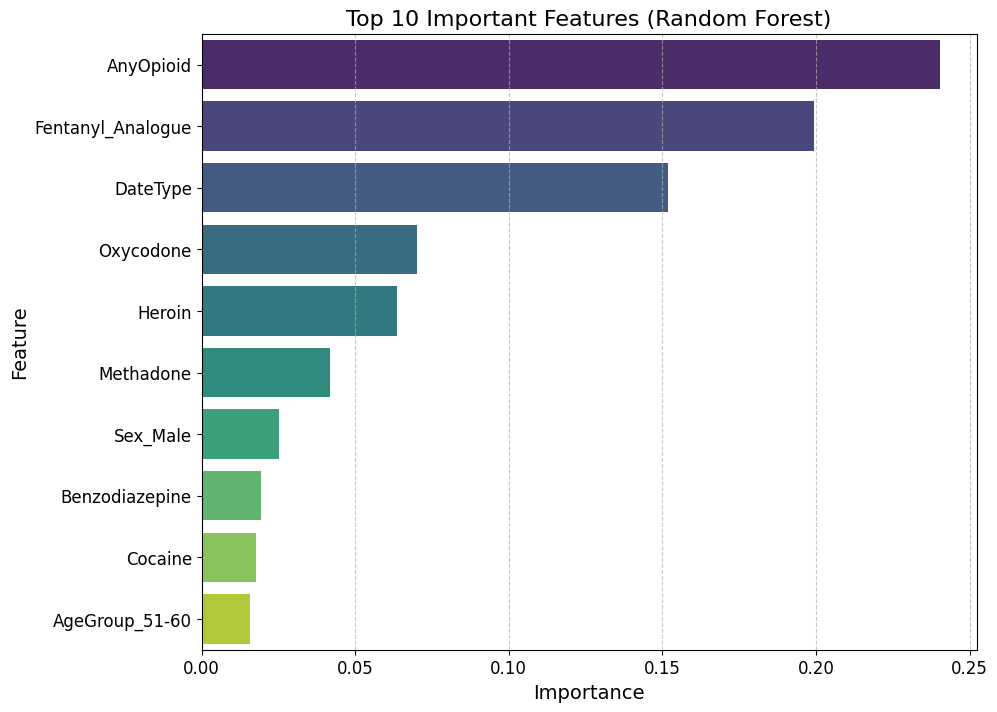

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Getting feature importances from the Random Forest model
feature_importances = random_forest_best.feature_importances_

# Creating a DataFrame for the feature importances
features_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sorting the features based on importance
features_df = features_df.sort_values(by='Importance', ascending=False)

# Plotting the feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=features_df.head(10), palette='viridis')
plt.title('Top 10 Important Features (Random Forest)', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


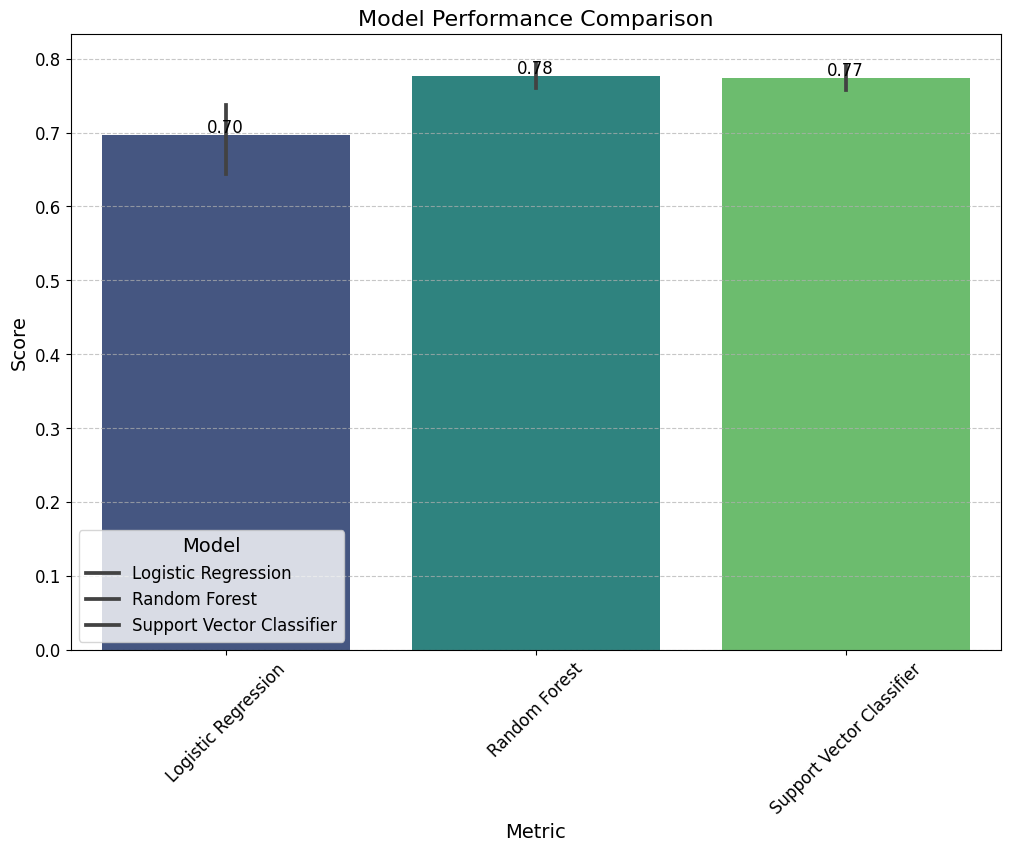

In [11]:
# Transposing the performance DataFrame for easier plotting
performance_df_transposed = performance_df.T

# Plotting the model performance comparison
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=performance_df_transposed, palette='viridis')
plt.title('Model Performance Comparison', fontsize=16)
plt.ylabel('Score', fontsize=14)
plt.xlabel('Metric', fontsize=14)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.legend(title='Model', title_fontsize='14', labels=performance_df.index, fontsize='12')

# Adding the text labels in each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
# Preparing the model metrics information
model_metrics_info = """
Model: Random Forest Classifier

Features:
{features}

Parameters:
- Number of Trees (n_estimators): 100
- Maximum Depth of Trees (max_depth): 10
- Minimum Samples per Leaf (min_samples_leaf): 1
- Minimum Samples for Split (min_samples_split): 5

Hyperparameters:
- Best hyperparameters from GridSearchCV:
  - max_depth: 10
  - min_samples_leaf: 1
  - min_samples_split: 5
  - n_estimators: 100

Performance Metrics (Test Set):
- Accuracy: {accuracy:.2f}%
- Precision: {precision:.2f}%
- Recall: {recall:.2f}%
- F1 Score: {f1:.2f}%
""".format(
    features=', '.join(features_df['Feature']),
    accuracy=performance_df.loc['Random Forest', 'Accuracy'] * 100,
    precision=performance_df.loc['Random Forest', 'Precision'] * 100,
    recall=performance_df.loc['Random Forest', 'Recall'] * 100,
    f1=performance_df.loc['Random Forest', 'F1 Score'] * 100
)

# Saving the model metrics information to a txt file
model_metrics_file_path = '/mnt/data/Model_Metrics.txt'
with open(model_metrics_file_path, 'w') as file:
    file.write(model_metrics_info)

model_metrics_file_path
